## Kidney Stone prediction using MRI
### Dataset Link - https://www.kaggle.com/datasets/mohammedrizwanmalik/kidney-stones-mri-and-ct-scans

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Filters for image

In [2]:
stone = cv2.imread('./Dataset/Train/Kidney_stone/1.3.46.670589.33.1.63700700749865510700001.5062181202000819812.png')
stone = cv2.resize(stone, (500,500))
cv2.imshow('Stone', stone)
cv2.waitKey()

-1

In [3]:
laplace_img = cv2.Laplacian(stone,-5)
cv2.imshow('Laplace', laplace_img)
cv2.waitKey()

-1

In [4]:
from skimage.filters import sobel
sobel_img = sobel(stone)
cv2.imshow('Sobel', sobel_img)
cv2.waitKey()

-1

### Reading the dataset

In [5]:
stone_absent = os.listdir('./Dataset/Train/Normal/')
stone_present = os.listdir('./Dataset/Train/Kidney_stone/')

min_width = 10000
min_height = 10000

for i in stone_absent:
    s = cv2.imread('./Dataset/Train/Normal/'+i).shape
    min_width = min_width if min_width<s[0] else s[0]
    min_height = min_height if min_height<s[1] else s[1]
print(min_width,min_height)

702 614


In [6]:
stone_absent = os.listdir('./Dataset/Train/Normal/')
stone_present = os.listdir('./Dataset/Train/Kidney_stone/')

X = []
y = []

for i in stone_absent:
    gray = cv2.cvtColor(cv2.resize(cv2.imread('./Dataset/Train/Normal/'+i),(600,500)),cv2.COLOR_BGR2GRAY)
    X.append(gray)
    y.append(0)

for i in stone_present:
    gray = cv2.cvtColor(cv2.resize(cv2.imread('./Dataset/Train/Kidney_stone/'+i),(600,500)),cv2.COLOR_BGR2GRAY)
    X.append(gray)
    y.append(1)

In [7]:
X = np.array(X)
y = np.array(y)
X.shape

(1453, 500, 600)

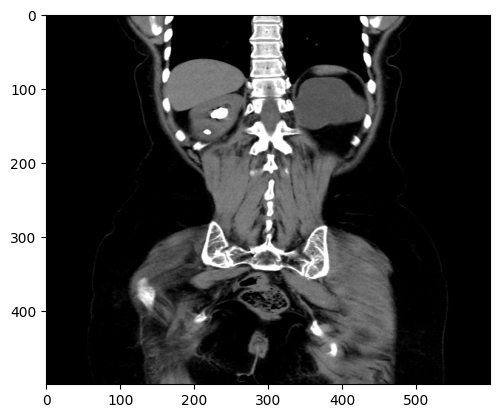

In [8]:
plt.imshow(X[1000], cmap='gray')
plt.show()

In [9]:
X = X.reshape(len(X),-1)
X.shape

(1453, 300000)

In [10]:
pd.Series(y).value_counts()

0    828
1    625
Name: count, dtype: int64

### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)

(1162, 300000) (291, 300000)


In [13]:
print(X_train.max(), X_test.min())

255 0


In [14]:
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()
print(X_train.max(), X_test.min())

1.0 0.0


### Logistic Regression

In [16]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Mikil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
print('Training score(Logistic Regression):',log.score(X_train,y_train))
print('Testing score(Logistic Regression):',log.score(X_test,y_test))

Training score: 1.0
Training score: 0.8865979381443299


### Logistic Regression with higher numberr of iterations

In [24]:
log = LogisticRegression(max_iter=300)
log.fit(X_train,y_train)
print('Training score(Logistic Regression):',log.score(X_train,y_train))
print('Testing score(Logistic Regression):',log.score(X_test,y_test))

C:\Users\Mikil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score(Logistic Regression): 1.0
Testing score(Logistic Regression): 0.8762886597938144


### SVM

In [27]:
svc = SVC()
svc.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
svc.score(X_test,y_test)

In [ ]:
print('Training score(SVM):',svc.score(X_train,y_train))
print('Testing score(SVM):',svc.score(X_test,y_test))

### Test Data

In [19]:
stone_absent = os.listdir('./Dataset/Test/Normal/')
stone_present = os.listdir('./Dataset/Test/Kidney_stone/')

test_X = []
test_y = []

for i in stone_absent:
    gray = cv2.cvtColor(cv2.resize(cv2.imread('./Dataset/Test/Normal/'+i),(600,500)),cv2.COLOR_BGR2GRAY)
    test_X.append(gray)
    test_y.append(0)

for i in stone_present:
    gray = cv2.cvtColor(cv2.resize(cv2.imread('./Dataset/Test/Kidney_stone/'+i),(600,500)),cv2.COLOR_BGR2GRAY)
    test_X.append(gray)
    test_y.append(1)

In [20]:
test_X = np.array(test_X)
test_y = np.array(test_y)
test_X.shape

(346, 500, 600)

In [21]:
test_X = test_X.reshape(len(test_X),-1)
test_X.shape

(346, 300000)

In [22]:
pd.Series(test_y).value_counts()

0    181
1    165
Name: count, dtype: int64

In [25]:
print('Testing score(Logistic Regression):',log.score(test_X,test_y))

Testing score(Logistic Regression): 0.5317919075144508


In [26]:
print('Testing score(Logistic Regression):',svc.score(test_X,test_y))

NameError: name 'svc' is not defined